Импорты

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

Датасет

In [51]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=names)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Матрица корреляций между признаками на всей таблице 

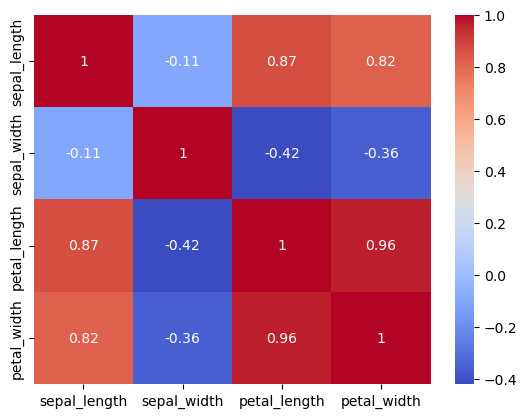

In [52]:
correlation = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Матрица корреляций отдельно по классам

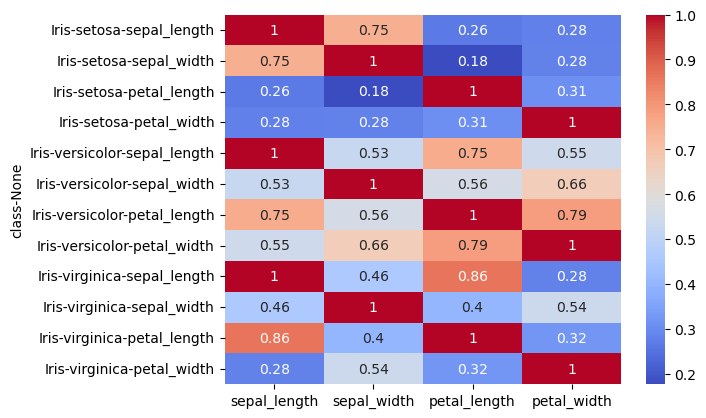

In [53]:
cor_class = df.groupby('class').apply(lambda x: x[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(method='pearson', numeric_only=True))
# Создание тепловой карты для cor_class
sns.heatmap(cor_class, annot=True, cmap='coolwarm')
plt.show()

Визуализация распределений классов на всех парах переменных

c:\Users\searg\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


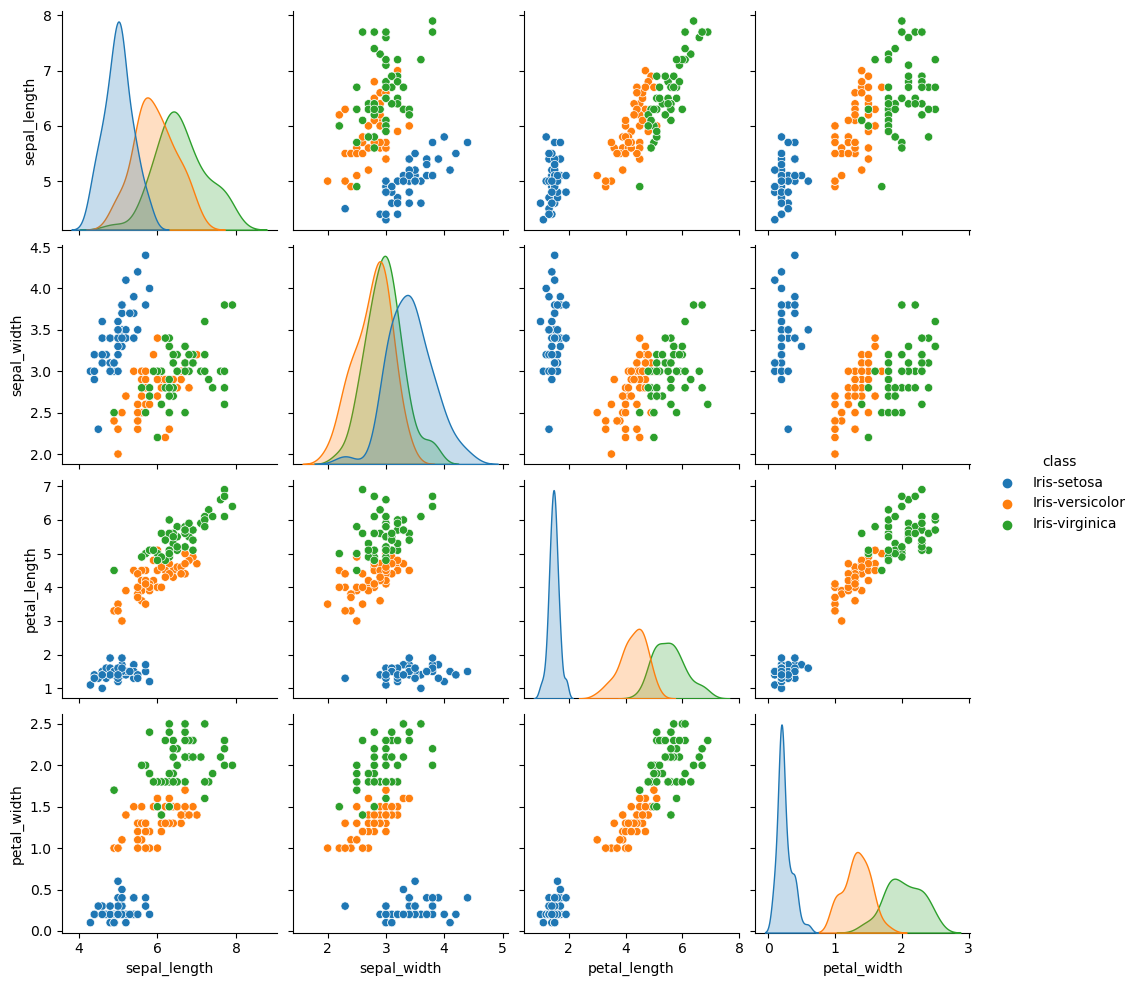

In [54]:
sns.pairplot(df, hue='class')

Решение разными моделями по двум переменным: petal_length, petal_width

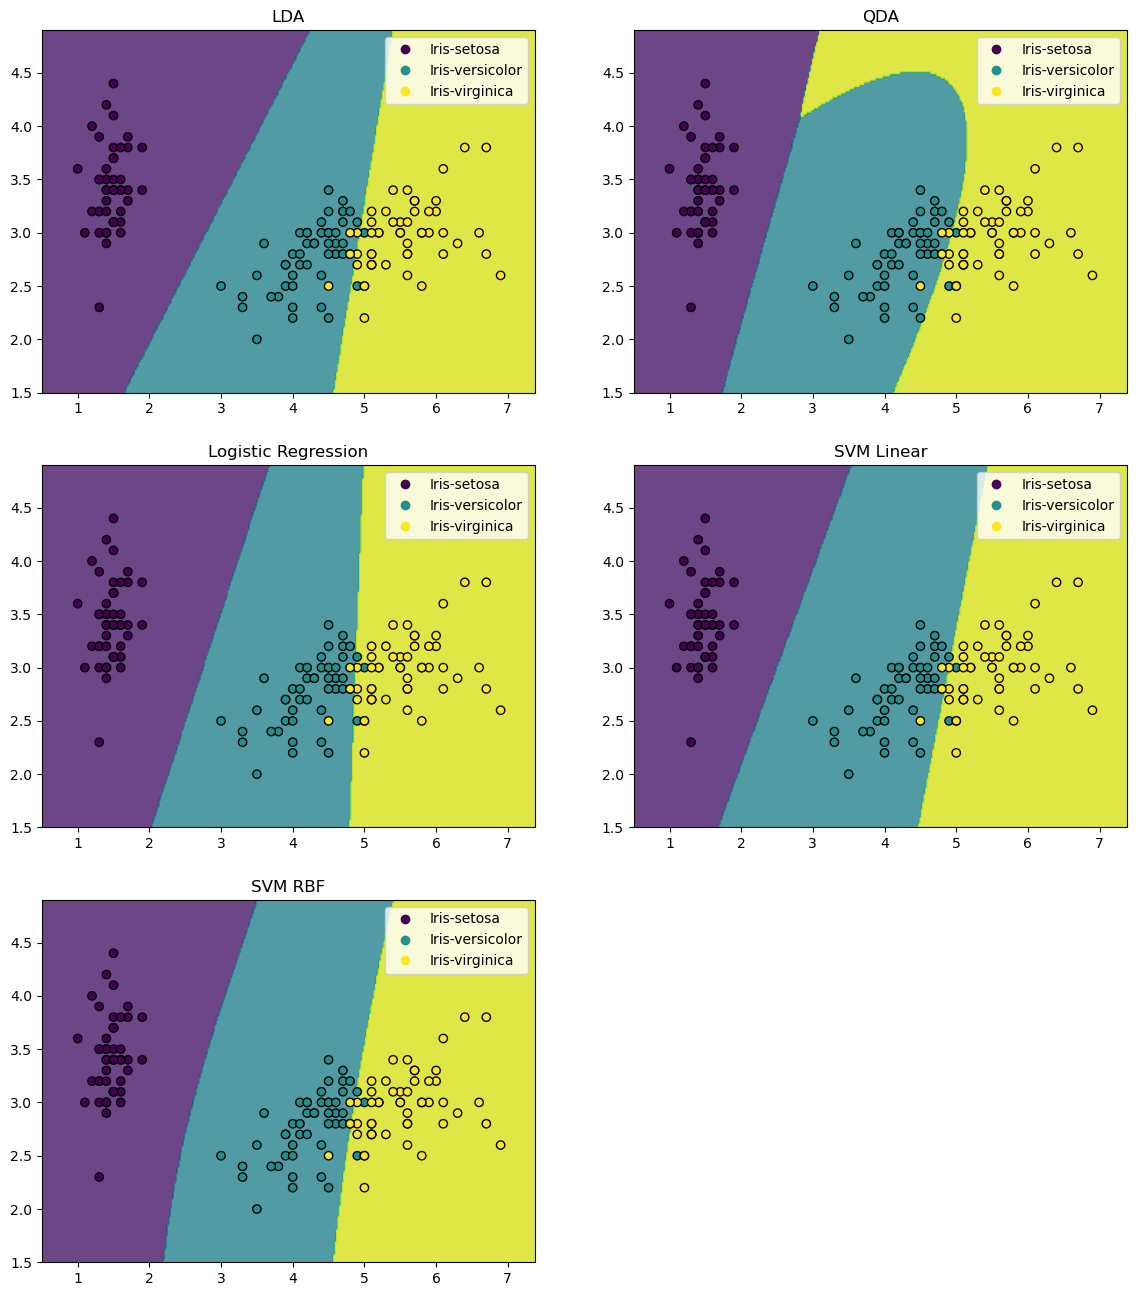

In [55]:
# Разделение датасета
X = df[['petal_length', 'sepal_width']].values  # возьмём petal_length, sepal_width
y = df['class'].values
# Создание экземпляра LabelEncoder
le = LabelEncoder()
# Преобразование категориальных значений в числовые
y = le.fit_transform(df['class'].values)

# Обучение моделей
lda = LinearDiscriminantAnalysis().fit(X, y)
qda = QuadraticDiscriminantAnalysis().fit(X, y)
log_reg = LogisticRegression().fit(X, y)
svm_linear = SVC(kernel='linear').fit(X, y)
svm_rbf = SVC(kernel='rbf').fit(X, y)
models = zip([lda, qda, log_reg, svm_linear, svm_rbf], ['LDA', 'QDA', 'Logistic Regression', 'SVM Linear', 'SVM RBF'])

# Визуализация
plt.figure(figsize=(14, 16))

# Создание списка меток для классов
class_labels = df['class'].unique().tolist()
for i, (model, title) in enumerate(models):
    plt.subplot(3, 2, i + 1)
    
    # Создание сетки для оценки каждой модели
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # размер шага в сетке
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Построение контура и областей решений
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=.8)
    
    # Нанесение точек данных на график
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    
    # Добавление легенды
    plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)

plt.show()


Линейный дискриминант на всех переменных 

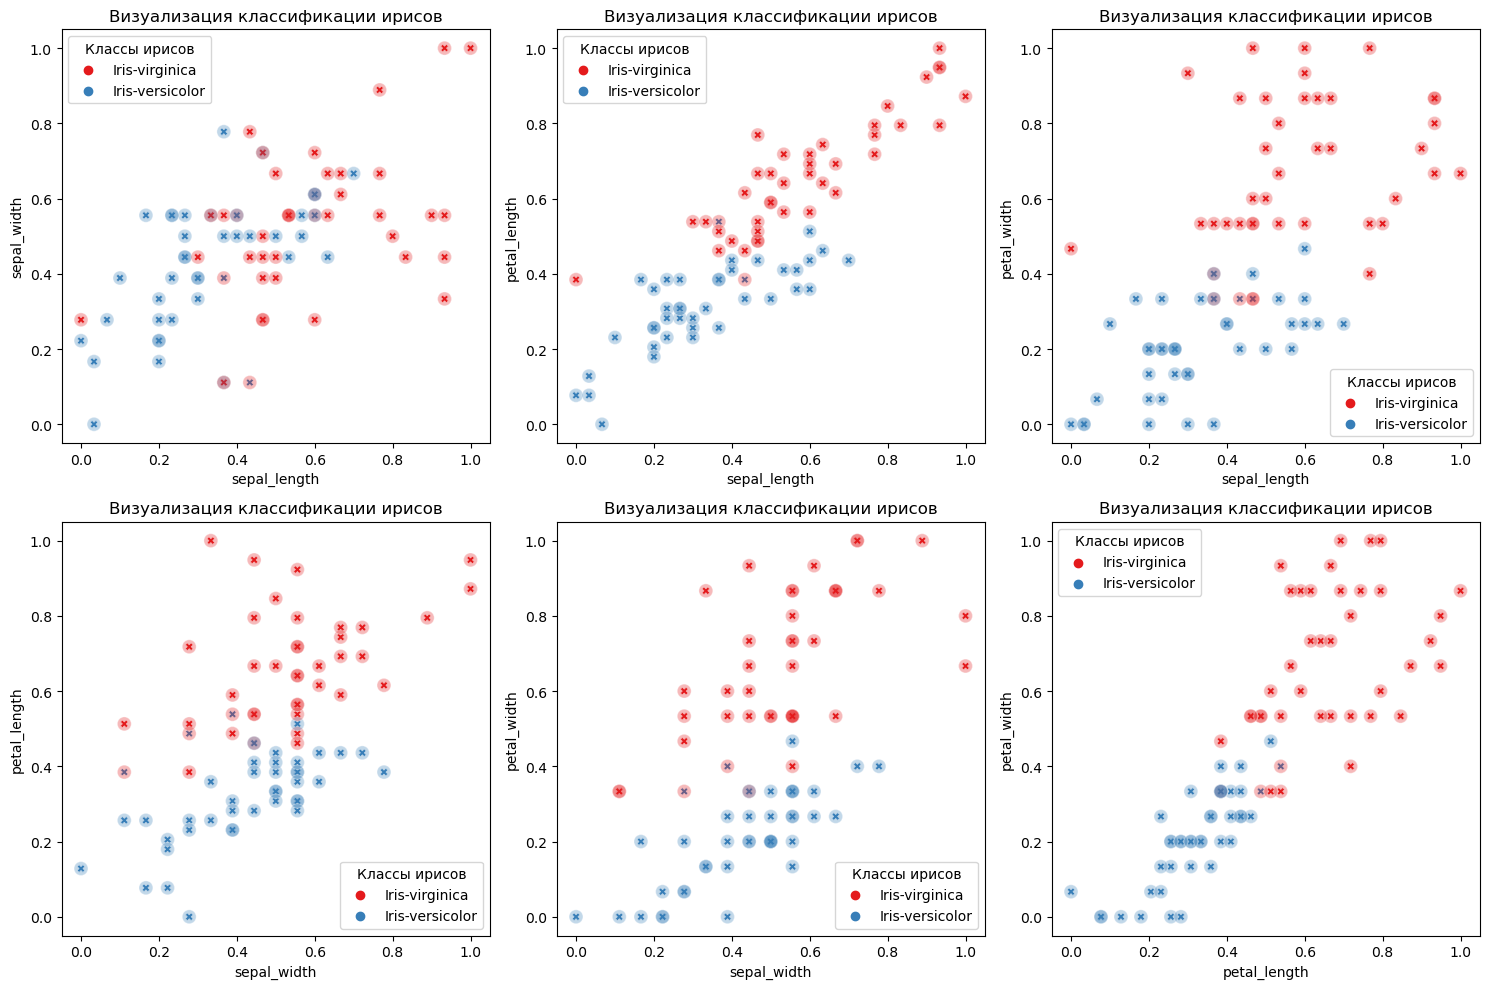

In [56]:
# Подготовка DataFrame
df = pd.read_csv(url, names=names)
df = df.loc[df['class'] != 'Iris-setosa']

# Разделение датасета
X = df.drop('class', axis=1)
le = LabelEncoder()
y = le.fit_transform(df['class'].values)

# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Создайте и обучите модель
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Нормализация данных и добавление предсказаний
X_test_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)
X_test_scaled['class'] = le.inverse_transform(y_test)
X_test_scaled['predictions'] = le.inverse_transform(lda.predict(X_test))

# Функция для создания подграфика
def create_subplot(df, i, j):
    sns.scatterplot(data=df, x=df.columns[i], y=df.columns[j], hue='class', palette='Set1', alpha=1, s=30, marker='X')
    sns.scatterplot(data=df, x=df.columns[i], y=df.columns[j], hue='predictions', palette='Set1', alpha=0.3, s=100, legend=False)
    plt.title('Визуализация классификации ирисов')
    plt.xlabel(df.columns[i])
    plt.ylabel(df.columns[j])
    plt.legend(title='Классы ирисов')

# Визуализация
plt.figure(figsize=(15, 10))
for plot_number, (i,j) in enumerate([(i,j) for i in range(3) for j in range(i+1, 4)], start=1):
    plt.subplot(2, 3, plot_number)
    create_subplot(X_test_scaled, i, j)
plt.tight_layout()
plt.show()


In [57]:
# Разделение датасета
df = df.loc[df['class'] != 'Iris-setosa']
X = df[['petal_length', 'sepal_width']].values  # возьмём petal_length, sepal_width
y = df['class']
print(np.unique(y))
# Создание экземпляра LabelEncoder
le = LabelEncoder()
# Преобразование категориальных значений в числовые
class_labels = np.unique(y).tolist()
y = le.fit_transform(y.values)


['Iris-versicolor' 'Iris-virginica']


Квадратичная разделяющая функция определяет расстояние от каждого объекта до центра каждого класса, учитывая форму и ориентацию класса. 

Формула:

$$\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log \pi_k$$

где:
- $x$ - это вектор признаков объекта
- $\mu_k$ - это среднее значение признаков для класса $k$
- $\Sigma_k$ - это ковариационная матрица для класса $k$
- $\pi_k$ - это априорная вероятность класса $k$

Первый член этой функции связан с формой класса, второй член связан с расстоянием от объекта до центра класса, а третий член связан с общим размером класса. Объект классифицируется как принадлежащий классу, для которого значение этой функции максимально.

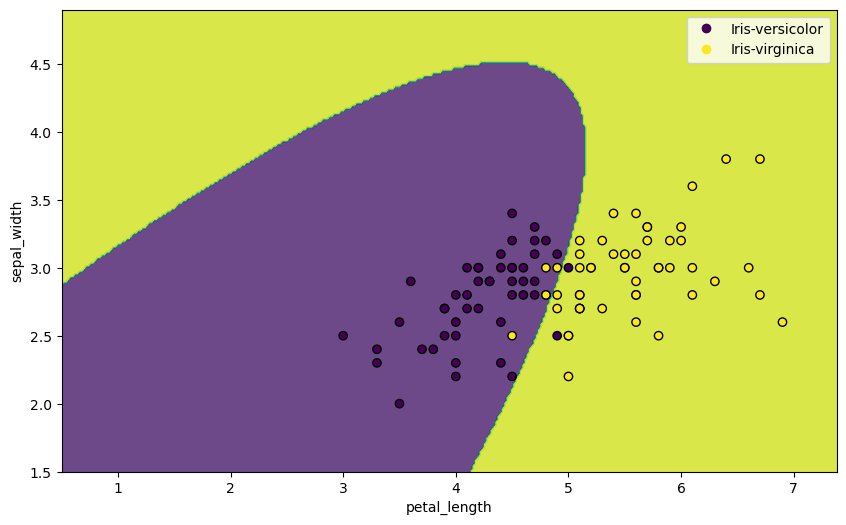

In [61]:
# Вычисление средних значений и ковариационных матриц для каждого класса, а также априорных вероятностей
means = []
covs = []
priors = []
for i in np.unique(y):
    X_i = X[y == i]
    means.append(np.mean(X_i, axis=0))
    covs.append(np.cov(X_i.T))
    priors.append(X_i.shape[0] / X.shape[0])

# Функция для вычисления квадратичной разделяющей функции
def quadratic_discriminant(x, mean, cov, pi_k):
    return -0.5 * np.log(np.linalg.det(cov)) - 0.5 * (x - mean).T @ np.linalg.inv(cov) @ (x - mean) + np.log(pi_k)

# Визуализация результатов
plt.figure(figsize=(10, 6))

xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Вычисление квадратичной разделяющей функции для каждой точки на сетке
Z = np.array([np.argmax([quadratic_discriminant(x, mean, cov, pi_k) for mean, cov, pi_k in zip(means, covs, priors)]) for x in xy])
Z = Z.reshape(xx.shape)

# отображение границ решений
plt.contourf(xx, yy, Z, alpha=0.8)

# отображение данных
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
# Добавление легенды
plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)
plt.show()


(171, 345)


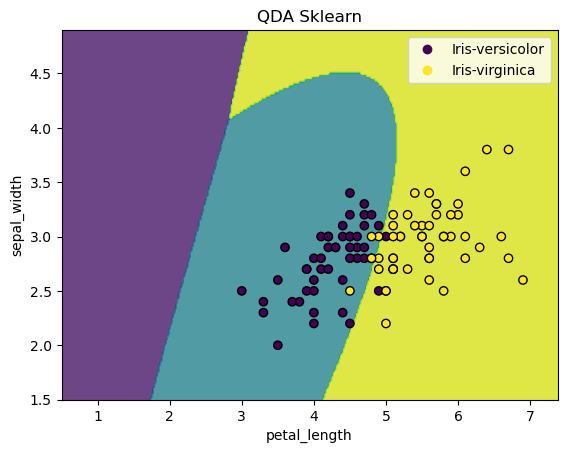

In [64]:
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
# Построение контура и областей решений
Z = Z.reshape(xx.shape)
print(xx.shape)
plt.contourf(xx, yy, Z, alpha=.8)

# Нанесение точек данных на график
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('QDA Sklearn')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
# Добавление легенды
plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)